# POLISCI 3 Fall 2021

## Week 7 Lecture Notebook 1: SANDBOX

In [1]:
library(estimatr)
library(ggplot2)
data <- read.csv('ps3_week7_electing_women.csv')
head(data)

,unique_id,treat,prop_sd_fem2014,sd_onefem2014,county,pc_male
,<int>,<chr>,<dbl>,<int>,<chr>,<int>
1,27215,supply,0.0,0,Grand,1
2,27386,control,0.0,0,Grand,0
3,27496,control,1.0,1,Grand,1
4,16202,demand,1.0,1,Daggett,1
5,16241,control,0.5,1,Daggett,1
6,26601,control,0.0,0,Emery,1


Here is a quick rundown of what each column means:

- `unique_id`: Precinct ID
- `treat`: treatment variable
    - `'control'`: control group
    - `'supply'`: supply group; party chair instructed to recruit 2-3 women
    - `'demand'`: demand group; party chair reads letter at precinct convention
    - `'both'`: a fourth group getting both the supply and demand treatments; party chair instructed to read letter *and* to recruit 2-3 women
- `prop_sd_fem2014`: **Outcome**: Proportion of 2014 elected state delegates from that precinct who were women
- `sd_onefem2014`: 1 if at least one woman was selected; 0 otherwise
- `county` : County name in Utah
- `pc_male`: 1 if precinct chair is male; 0 otherwise (precinct chair is person who runs precinct meeting, would read letter if assigned to do so, etc.)

In [2]:
# And here's the values of the treatment variable again:
table(data$treat)


   both control  demand  supply 
    427     435     426     446 

In [3]:
#how do we find the treatment effect comparing control to supply?
supply.effect <- difference_in_means(sd_onefem2014 ~ treat, data,
                                    condition1 = "control",
                                    condition2 = "supply")
supply.effect

Design:  Standard 
              Estimate Std. Error  t value   Pr(>|t|)    CI Lower CI Upper
treatsupply 0.06704809 0.03304681 2.028883 0.04277123 0.002188229 0.131908
                  DF
treatsupply 878.9986

In [4]:
#What's the difference between the treatment effect and the standard error?

In [5]:
supply.effect$p.value

treatsupply 
 0.04277123

In [ ]:
# What does the p-value mean?

In [ ]:
# Imagine we're talking to someone who wants to increase the number of women in politics.
# How would we describe our finding above?

In [6]:
supply.effect$conf.low
supply.effect$conf.high

[1] 0.002188229

[1] 0.131908

In [ ]:
# How should we interpret the lower confidence interval 
# and the higher confidence interval?

In [7]:
# simulate estimates given the estimate and standard errors above
simulations <- rnorm(n = 10000, mean = supply.effect$coefficients, sd = supply.effect$std.error)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



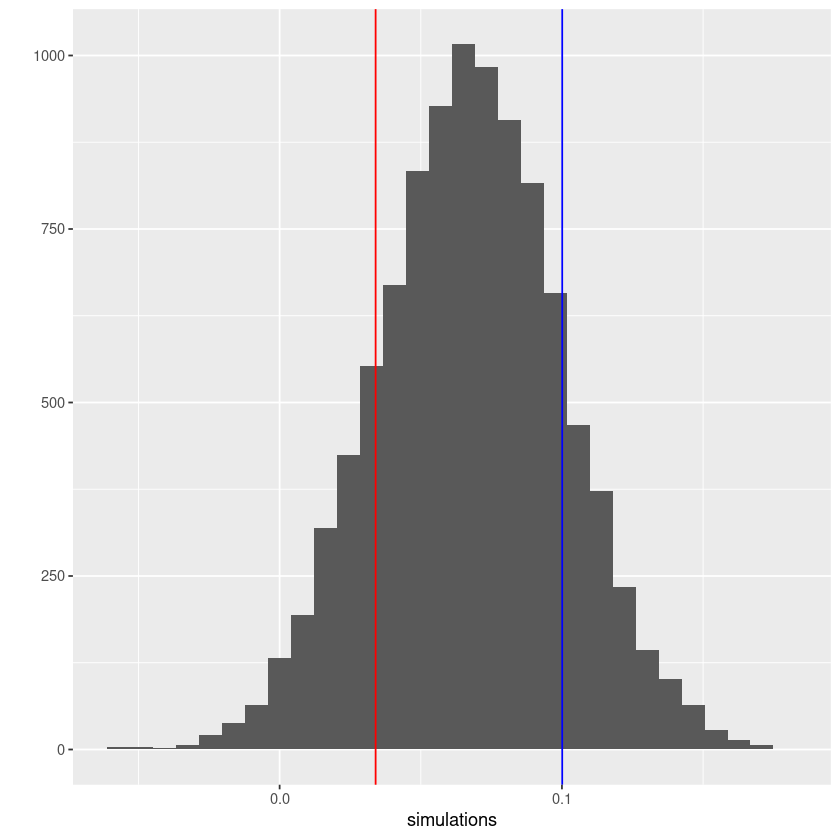

In [8]:
# 68.2% confidence intervals
qplot(simulations) +
    geom_vline(xintercept = supply.effect$coefficients + supply.effect$std.error, color = "blue") +
    geom_vline(xintercept = supply.effect$coefficients - supply.effect$std.error, color = "red")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



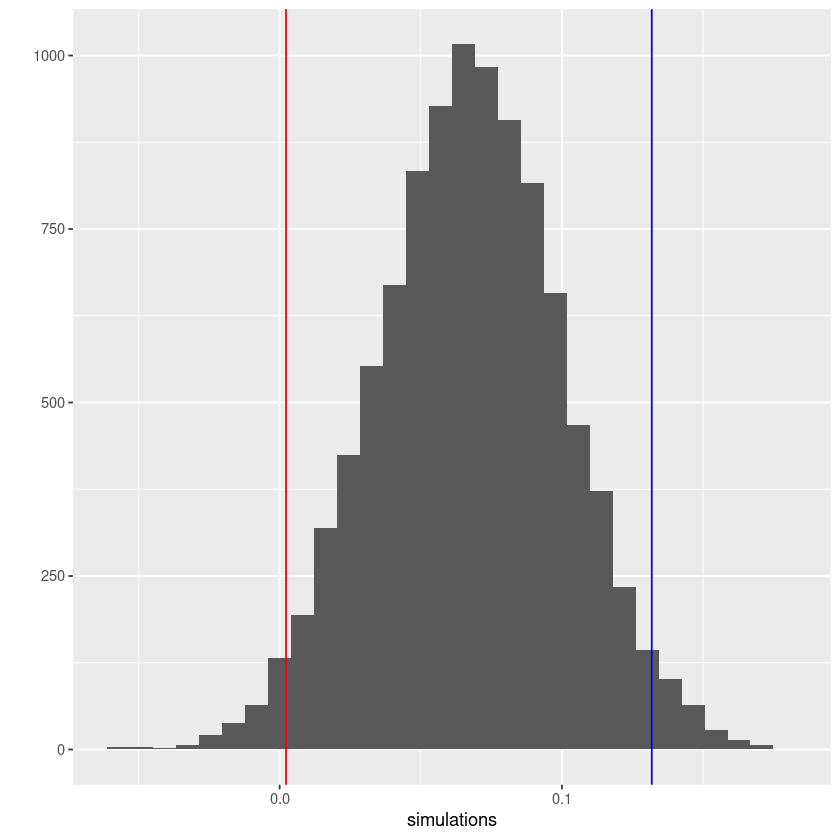

In [9]:
# 95% confidence intervals
qplot(simulations) +
    geom_vline(xintercept = supply.effect$coefficients + 1.96*supply.effect$std.error, color = "blue") +
    geom_vline(xintercept = supply.effect$coefficients - 1.96*supply.effect$std.error, color = "red")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



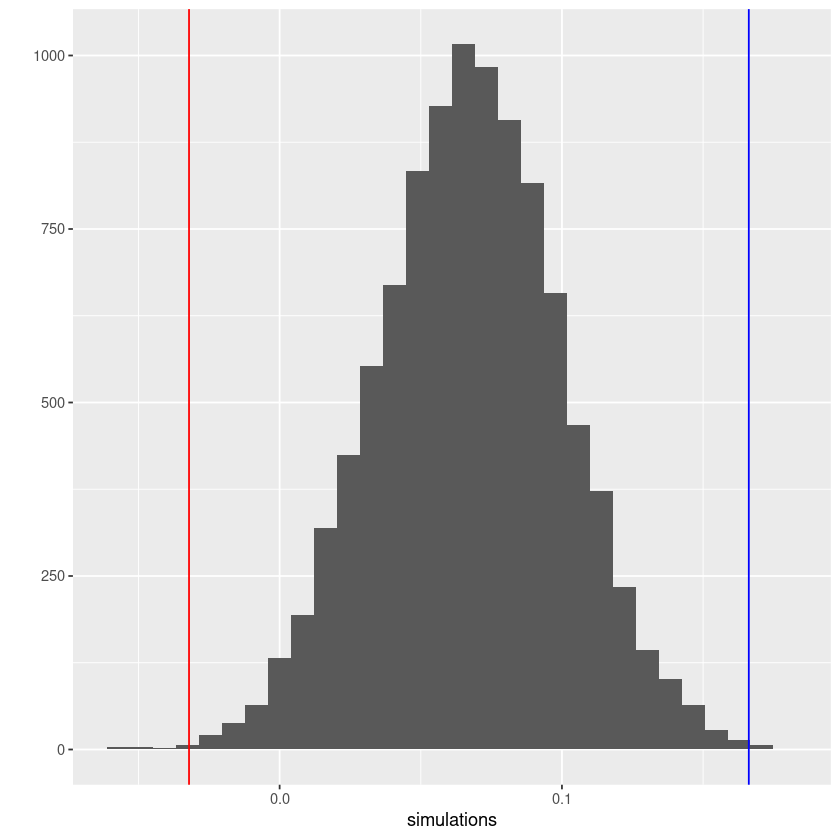

In [10]:
# 99.7% confidence intervals
qplot(simulations) +
    geom_vline(xintercept = supply.effect$coefficients + 3*supply.effect$std.error, color = "blue") +
    geom_vline(xintercept = supply.effect$coefficients - 3*supply.effect$std.error, color = "red")